<a href="https://colab.research.google.com/github/lilyzhizhou/ML-Final-Project/blob/main/Final_assn_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessary Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

Load the data

In [ ]:
# Read CSV file into Pandas df
import pandas as pd

df = pd.read_csv('datapd.csv')
df.head()

,Unnamed: 0,predm,Age_at_Exam,BMI,Total_Cholesterol,Depression,HTN,OA,COPD,corstrd_bin,htnmed_bin,Sex,Patient_ID
0,2,1,63,30.9,NaN,0,1,0,1,0,1,1,1001000000000054
1,2386,1,66,23.6,3.54,1,1,1,0,0,1,1,1001000000004538
2,7781,0,68,34.3,5.55,1,1,1,0,0,1,0,1001000000007331
3,7644,1,73,28.5,3.78,1,1,0,1,1,1,0,1001000000007333
4,2290,0,53,33.4,5.38,0,1,1,0,1,1,0,1001000000009032


Data Exploration/Cleaning

In [ ]:
# checking the data types
df.dtypes

Unnamed: 0             int64
predm                  int64
Age_at_Exam            int64
BMI                  float64
Total_Cholesterol    float64
Depression             int64
HTN                    int64
OA                     int64
COPD                   int64
corstrd_bin            int64
htnmed_bin             int64
Sex                    int64
Patient_ID             int64
dtype: object

In [ ]:
print(df.isna().sum())

Unnamed: 0             0
predm                  0
Age_at_Exam            0
BMI                    0
Total_Cholesterol    152
Depression             0
HTN                    0
OA                     0
COPD                   0
corstrd_bin            0
htnmed_bin             0
Sex                    0
Patient_ID             0
dtype: int64


In [ ]:
#impute missing data in the cholesterol column with median
df['Total_Cholesterol']=df['Total_Cholesterol'].fillna(df['Total_Cholesterol'].median())

df.info()

# Print the cleaned DataFrame
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6414 entries, 0 to 6413
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6414 non-null   int64  
 1   predm              6414 non-null   int64  
 2   Age_at_Exam        6414 non-null   int64  
 3   BMI                6414 non-null   float64
 4   Total_Cholesterol  6414 non-null   float64
 5   Depression         6414 non-null   int64  
 6   HTN                6414 non-null   int64  
 7   OA                 6414 non-null   int64  
 8   COPD               6414 non-null   int64  
 9   corstrd_bin        6414 non-null   int64  
 10  htnmed_bin         6414 non-null   int64  
 11  Sex                6414 non-null   int64  
 12  Patient_ID         6414 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 651.5 KB
      Unnamed: 0  predm  Age_at_Exam   BMI  Total_Cholesterol  Depression  \
0              2      1           63  30.9 

In [ ]:
#double check if there are not missing values anymore
print(df.isna().sum())

Unnamed: 0           0
predm                0
Age_at_Exam          0
BMI                  0
Total_Cholesterol    0
Depression           0
HTN                  0
OA                   0
COPD                 0
corstrd_bin          0
htnmed_bin           0
Sex                  0
Patient_ID           0
dtype: int64


In [ ]:
#remove "Patient_ID" column
df=df.drop('Patient_ID', axis=1)

In [ ]:
#check if patient id column is gone
df.dtypes

Unnamed: 0             int64
predm                  int64
Age_at_Exam            int64
BMI                  float64
Total_Cholesterol    float64
Depression             int64
HTN                    int64
OA                     int64
COPD                   int64
corstrd_bin            int64
htnmed_bin             int64
Sex                    int64
dtype: object

Preprocess the data

In [ ]:
#split data into features and labels
X = df[['Depression', 'HTN', 'OA', 'COPD', 'Sex', 'corstrd_bin','htnmed_bin', 'Age_at_Exam','BMI','Total_Cholesterol']]
y = df['predm']

Split data into training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Check Error rate for k=1 to 40

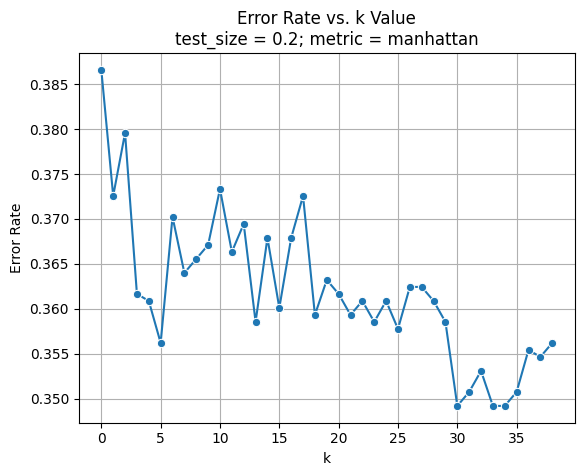

In [ ]:
# Distance metric used
met = 'manhattan'

# Check error rate for k = 1 to 40
error_rate = []

for k in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors = k, metric = met)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  error_rate.append(1 - accuracy_score(y_test, y_pred))

# Plot line graph of error rate
sns.lineplot(error_rate, marker = 'o')
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. k Value\ntest_size = 0.2; metric = manhattan')

plt.show()

Run KNN

[[507 253]
 [243 280]]
              precision    recall  f1-score   support

           0       0.68      0.67      0.67       760
           1       0.53      0.54      0.53       523

    accuracy                           0.61      1283
   macro avg       0.60      0.60      0.60      1283
weighted avg       0.61      0.61      0.61      1283



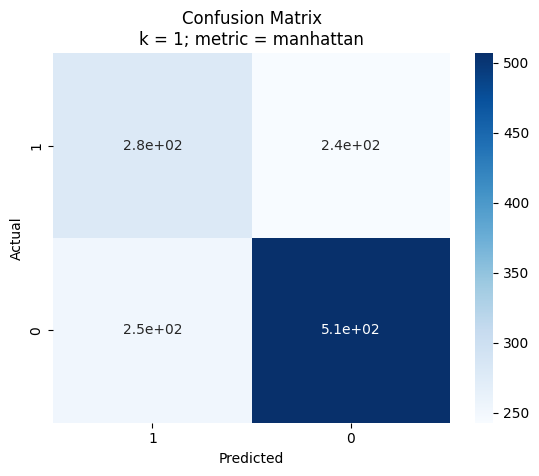

In [ ]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Distance metric used
met = 'manhattan'

# Initialize K-NN classifier and fit the model
knn = KNeighborsClassifier(n_neighbors = 1, metric = met)   # Set K = 5 (lowest error rate)
knn.fit(X_train, y_train)                                   # Set metric = 'manhattan'

# Predict using test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize K-NN results using confusion matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = df['predm'].unique()

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred, labels = classes), annot = True,
            xticklabels = classes, yticklabels = classes, cmap = 'Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
title = 'Confusion Matrix\nk = 1; metric = ' + met
plt.title(title)

plt.show()

minkowski and euclidean:
recall for 0= 0.65
recall for 1= 0.54
manhattan:
recall for 0= 0.67
recall for 1= 0.54